In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
job_data = pd.read_csv("dataset/train_data.csv")
job_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
job_data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [3]:
job_data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
job_data['workex'] = LabelEncoder().fit_transform(job_data['workex'])
job_data['status'] = LabelEncoder().fit_transform(job_data['status'])

In [6]:
job_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


In [7]:
features = ['ssc_p','hsc_p','degree_p','workex','etest_p']
X = job_data[features]
y = job_data["status"]

In [12]:
data = job_data.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation','mba_p','salary'], axis=1)
data

,ssc_p,hsc_p,degree_p,workex,etest_p,status
0,67.00,91.00,58.00,0,55.0,1
1,79.33,78.33,77.48,1,86.5,1
2,65.00,68.00,64.00,0,75.0,1
3,56.00,52.00,52.00,0,66.0,0
4,85.80,73.60,73.30,0,96.8,1
...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,91.0,1
211,58.00,60.00,72.00,0,74.0,1
212,67.00,67.00,73.00,1,59.0,1
213,74.00,66.00,58.00,0,70.0,1


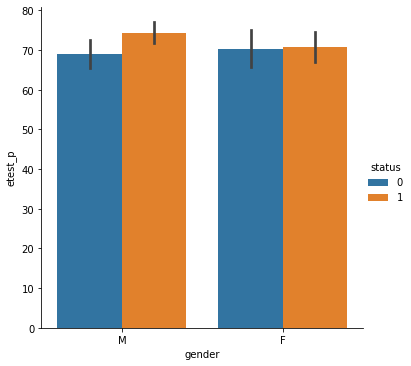

In [38]:
sns.catplot(x="gender",y="etest_p",hue="status",kind="bar",data=job_data)

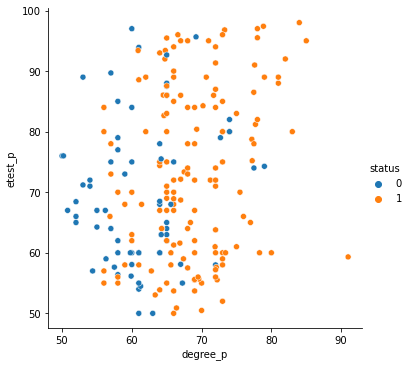

In [39]:
sns.relplot(x="degree_p",y="etest_p",hue="status",data=job_data)

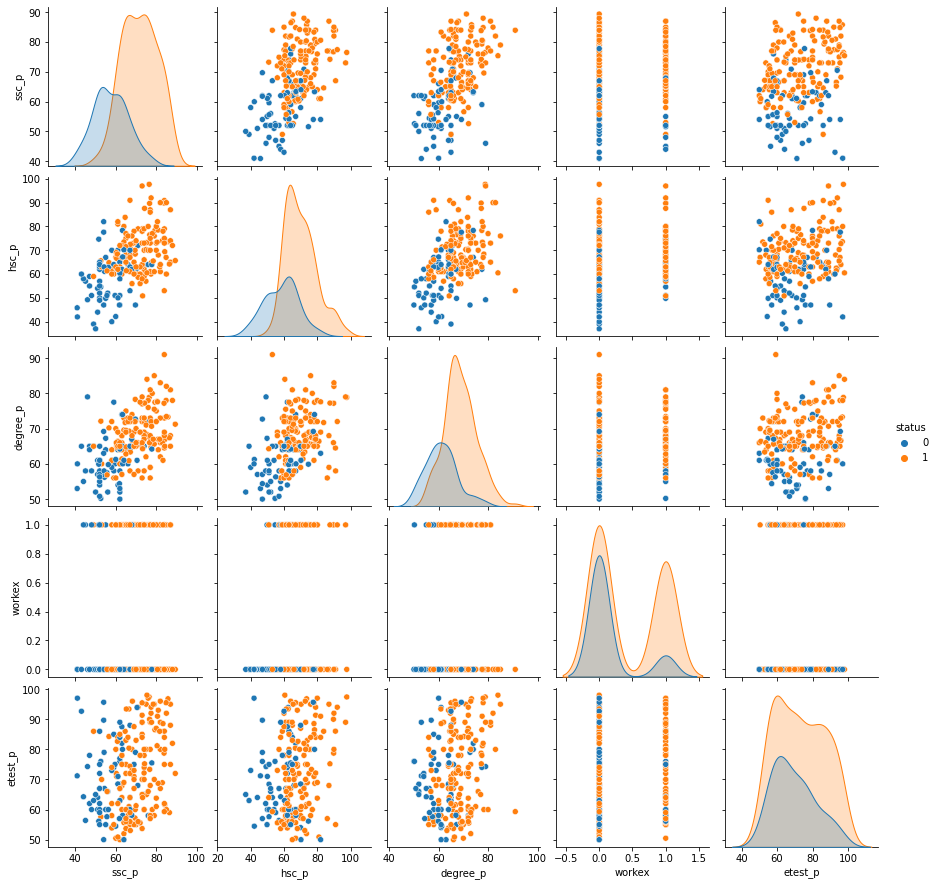

In [13]:
sns.pairplot(data, hue='status', diag_kind="kde")

In [14]:
y.shape

(215,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
X_test.shape

(65, 5)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
a = tf.keras.models.Sequential()

In [26]:
a.add(tf.keras.layers.Dense(11,kernel_initializer='random_uniform',activation='relu'))

In [31]:
a.add(tf.keras.layers.Dense(22,kernel_initializer='random_uniform',activation='relu'))

In [32]:
a.add(tf.keras.layers.Dense(1,kernel_initializer='random_uniform',activation='sigmoid'))

In [33]:
a.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [37]:
a.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.6933
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.6933
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.6933
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.6933
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7000
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7067
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7067
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7133
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7067
Epoch 11/50
5/5 [======================

In [ ]:
a.save('custom_model'+".h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(a)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

In [ ]:
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [32]:
y_pred = a.predict(X_test)

In [33]:
y_pred = y_pred[y_pred>0.5]

In [34]:
y_pred

array([0.72258395, 0.7492343 , 0.6897819 , 0.7521336 , 0.68787163,
       0.7455672 , 0.6851719 , 0.73254824, 0.7525315 , 0.69686747,
       0.74764866, 0.74049264, 0.68804556, 0.7244628 , 0.6761226 ,
       0.68785673, 0.6866045 , 0.7241937 , 0.7146988 , 0.702886  ,
       0.7401119 , 0.7174739 , 0.7055385 , 0.703992  , 0.7023978 ,
       0.7228174 , 0.72954655, 0.71758807, 0.6933897 , 0.7272384 ,
       0.6732697 , 0.6955698 , 0.6901768 , 0.71254396, 0.7078712 ,
       0.7205739 , 0.67222226, 0.72988325, 0.7102663 , 0.7333964 ,
       0.70148087, 0.7227417 , 0.72593814, 0.70574546, 0.70705795,
       0.70493126, 0.71823394, 0.727917  , 0.73281366, 0.70701253,
       0.69113374, 0.7565588 , 0.69502354, 0.70000416, 0.69968015,
       0.7611798 , 0.6871879 , 0.73593366, 0.74704564, 0.6951088 ,
       0.7007168 , 0.704393  , 0.7319887 , 0.73495126, 0.6910415 ],
      dtype=float32)

In [42]:
data=pd.DataFrame([90,90,75,1,85]).transpose()
print(data)
data.columns=['ssc_p','hsc_p','degree_p','workex','etest_p']
print(data)

new_pred = a.predict(data)

    0   1   2  3   4
0  90  90  75  1  85
   ssc_p  hsc_p  degree_p  workex  etest_p
0     90     90        75       1       85


In [45]:
type(new_pred)

numpy.ndarray

In [25]:
ano_pred = a.predict([[20,30,50,0,2]])
int(ano_pred[0][0]*100)

56

In [61]:
data = [[90,80,70,1,56]]


In [27]:
type(data)

list

In [66]:
res = a.predict(data)
res[0][0]

0.7429402

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:
import joblib
joblib.dump(scaler,'predict_scaler.pkl')

['predict_scaler.pkl']

In [52]:
data

[[20, 30, 50, 0, 2]]

In [56]:
scaler.fit(X_train)

MinMaxScaler()

In [59]:
ndata = scaler.transform([[90,80,70,1,56]])

In [60]:
a.predict(ndata)

array([[0.51252824]], dtype=float32)

In [1]:
from tensorflow.keras.models import load_model

In [3]:
predict_model = load_model('model/custom_model.h5')

In [7]:
place_scaler = joblib.load('predict_scaler.pkl')

In [8]:
predict_example = {"ssc_p":90,
                  "hsc_p":85,
                  "degree_p":75,
                  "workex":1,
                  "etest_p":80}

In [29]:
def return_prediction(model,sample_json):
    
    s_percent = sample_json["ssc_p"]
    h_percent = sample_json["hsc_p"]
    d_percent = sample_json["degree_p"]
    w_experience = sample_json["workex"]
    e_percent = sample_json["etest_p"]
    
    data = [[s_percent,h_percent,d_percent,w_experience,e_percent]]
    print(type(data))
    
    class_ind = model.predict(data)
    
    return int(class_ind[0][0]*100)

In [30]:
return_prediction(predict_model,predict_example)

<class 'list'>


75

CODE FOR DEPLOYMENT


from tensorflow.keras.models import load_model

predict_model = load_model('model/custom_model.h5')

def return_prediction(model,sample_json):
    
    s_percent = sample_json["ssc_p"]
    h_percent = sample_json["hsc_p"]
    d_percent = sample_json["degree_p"]
    w_experience = sample_json["workex"]
    e_percent = sample_json["etest_p"]
    
    data = [[s_percent,h_percent,d_percent,w_experience,e_percent]]
    
    class_ind = model.predict(data)
    
    return int(class_ind[0][0]*100)